Support Vector Regression 

# Support Vector Regression (SVR) vs Linear Regression - Simple Explanation

## Linear Regression - Drawing the Best Line

Imagine you're trying to predict house prices based on their size. You plot all your data points on a graph and try to **draw a single straight line** through them that gets as close as possible to all the points.

### How it works:
- It's like finding the "average path" through all your data points
- The line tries to minimize the total distance from all points to the line
- Every point "pulls" the line toward itself
- If you have one weird data point (outlier) way off from the others, it can pull your line in the wrong direction

### Example:
If most 2000 sq ft houses cost $300K, but one costs $800K (maybe it's a mansion), that one expensive house will pull your prediction line upward, making predictions worse for normal houses.

---

## Support Vector Regression (SVR) - Creating a Tube

Now imagine instead of drawing a line, you're **creating a tube or margin** around your data.

### How it works:
- You define a "tube" of acceptable error (like saying "I'm okay with predictions being off by ±$10K")
- The goal is to fit as many points as possible INSIDE this tube
- Points inside the tube are considered "good enough" - they don't affect the prediction line
- Only points OUTSIDE the tube matter - these are called "support vectors"
- The weird outliers have less impact on your predictions

### Example:
With that same $800K mansion, SVR says "this is outside my acceptable range, but I won't let it ruin my predictions for normal houses." It creates a more stable prediction line.

---

## Key Differences (In Simple Terms)

| Aspect | Linear Regression | SVR |
|--------|------------------|-----|
| **Goal** | Get as close to every point as possible | Get most points within an acceptable margin |
| **Outliers** | Can mess up predictions badly | Less affected by weird data |
| **Complexity** | Simple and straightforward | More complex, but more robust |
| **When to use** | Clean data without many outliers | Messy real-world data with outliers |

---

## Real-World Analogy

**Linear Regression** is like a teacher who tries to make every single student happy with their grade - even the one student with impossible demands might force them to curve the whole class unfairly.

**SVR** is like a teacher who says "I'm okay with grades being within ±5 points of perfect" - students within that range don't cause stress, and the one demanding student won't ruin the grading system for everyone else.

---

## Bottom Line

### Use Linear Regression when:
- Your data is clean
- You want simplicity
- You don't have many outliers

### Use SVR when:
- Your data has outliers or noise
- You want more robust predictions that won't be thrown off by weird data points

**Think of SVR as the "tougher" version of linear regression that doesn't let outliers boss it around!**

the data set shows the salary of different positions of a company
for SVR we need feature scaling, because as in SLR,MLR,PR there is no coefficients to componsat teh significance of each feature

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_set = pd.read_csv('Position_Salaries.csv')

In [ ]:
X = data_set.iloc[:,1:-1].values
y = data_set.iloc[:, -1].values

In [12]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [13]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [17]:
y= y.reshape((len(y),1))

In [18]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [8]:
from sklearn.preprocessing   import StandardScaler

In [19]:
scalerx = StandardScaler()
scalery = StandardScaler()

In [21]:
X = scalerx.fit_transform(X)
y = scalery.fit_transform(y)

In [26]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [23]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [30]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')

In [32]:
regressor.fit(X,y)

C:\Users\Public.PayOk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [33]:
#inverse the scale of y as we scaled y.
#since we used scaled objects to train model, we need to pass the sacled future input like below

In [34]:
scalery.inverse_transform(regressor.predict(scalerx.fit_transform([[6.5]])).reshape(-1,1))

array([[131106.77303274]])

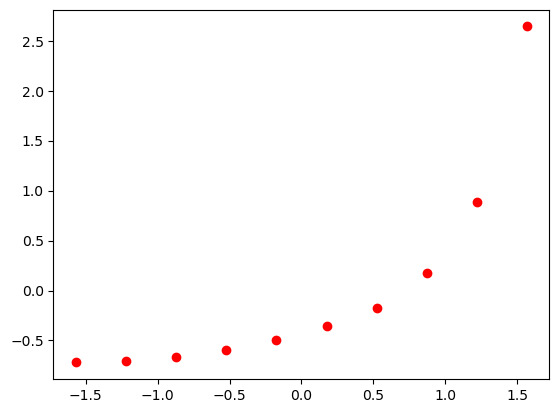

In [35]:
plt.scatter(X,y,color = 'red')

Text(0, 0.5, 'predicted salary ')

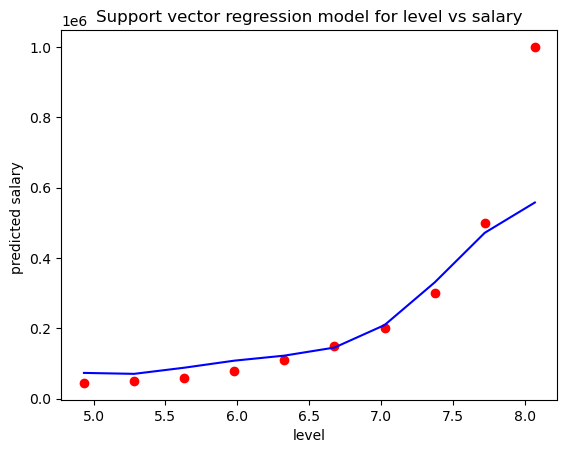

In [38]:
plt.scatter(scalerx.inverse_transform(X),scalery.inverse_transform(y),color = 'red')
plt.plot(scalerx.inverse_transform(X) ,scalery.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Support vector regression model for level vs salary')
plt.xlabel('level')
plt.ylabel('predicted salary ')
